## <p align='center'>EDA on RCS Lifetime Stats By Month Dataset</p>

In [1]:
# Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import the dataset
rcs = pd.read_csv("RCS_Lifetime_by_Month_Table.csv")
rcs

,instance_id,client_name,site_name,region_name,client_region_name,site_region_name,month_date,total_lifetimes,total_user_days_online_this_month,total_users_online_this_month,...,poll_completions,survey_completions,certification_completions,achievement_completions,community_comments,community_replies,community_likes,snippets_created,snippets_viewed,engagement_score
0,B9A1AF2B98B61FC3D5D15CD97F4FFF7C,Google TV,Google TV,NaN,Google TV,Google TV,2025-07-01,3167,68,28,...,0,0,0,0,0,0,0,0,29,74
1,B9A1AF2B98B61FC3D5D15CD97F4FFF7C,Google TV,Google TV,NaN,Google TV,Google TV,2025-01-01,1856,14,5,...,0,0,0,0,0,0,0,0,7,18
2,8E5E684A2BEAEFA7FECF7F0DA8B601E8,HALIGHT,The Quarry,NaN,HALIGHT,The Quarry,2025-04-01,1034,80,18,...,8,0,0,0,0,0,0,0,6,63
3,8E5E684A2BEAEFA7FECF7F0DA8B601E8,HALIGHT,The Quarry,NaN,HALIGHT,The Quarry,2023-09-01,2023,309,49,...,0,0,0,0,7,0,43,0,71,657
4,8E5E684A2BEAEFA7FECF7F0DA8B601E8,HALIGHT,The Quarry,NaN,HALIGHT,The Quarry,2023-11-01,2002,367,55,...,34,4,0,0,3,2,31,1,78,1078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,DE6B0516B9970243DA32DAC4AD8285D8,Motorola,motorola insiders,EMEA,Motorola EMEA,motorola insiders EMEA,2024-10-01,31035,5249,743,...,4,0,0,310,300,8,331,0,0,7678
852,9F5BAB40874B176781DBEEECF8E6833D,"Holcim Solutions and Products US, LLC",BPU,NaN,"Holcim Solutions and Products US, LLC",BPU,2022-10-01,2265,59,30,...,0,0,0,0,0,0,0,0,0,385
853,DE6B0516B9970243DA32DAC4AD8285D8,Motorola,motorola insiders,EMEA,Motorola EMEA,motorola insiders EMEA,2025-01-01,42810,5508,804,...,10,0,0,369,193,0,190,0,0,8088
854,F64BB50632BD035D9ACDCF5A45F76B7C,Allina Health,Learning Hub,NaN,Allina Health,Learning Hub,2024-05-01,221857,34907,13550,...,2649,1,0,1,14,17,32,0,0,62987


In [3]:
# Show basic information about the dataframe 
rcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   instance_id                        856 non-null    object 
 1   client_name                        856 non-null    object 
 2   site_name                          856 non-null    object 
 3   region_name                        155 non-null    object 
 4   client_region_name                 856 non-null    object 
 5   site_region_name                   856 non-null    object 
 6   month_date                         856 non-null    object 
 7   total_lifetimes                    856 non-null    int64  
 8   total_user_days_online_this_month  856 non-null    int64  
 9   total_users_online_this_month      856 non-null    int64  
 10  avg_daily_engagement_score         839 non-null    float64
 11  total_lifetime_days                856 non-null    int64  

In [4]:
#Number of Categorical Columns
categorical_cols = rcs.select_dtypes(include='object').columns
print(f"Categorical Variables: {len(categorical_cols)}")

Categorical Variables: 7


In [5]:
#Number of Numerical Columns
numeric_cols = rcs.select_dtypes(exclude='object').columns
print(f"Numerical Variables: {len(numeric_cols)}")

Numerical Variables: 23


In [6]:
# Descriptive statistics for numeric data (transposed for readability)
rcs.describe().T

,count,mean,std,min,25%,50%,75%,max
total_lifetimes,856.0,1.143505e+05,2.142195e+05,1.0,2105.000000,10693.000000,1.068470e+05,1.072601e+06
total_user_days_online_this_month,856.0,1.011383e+04,2.171912e+04,0.0,92.000000,496.500000,5.347250e+03,1.562620e+05
total_users_online_this_month,856.0,2.159675e+03,4.173432e+03,0.0,34.000000,169.000000,1.789500e+03,2.257700e+04
avg_daily_engagement_score,839.0,3.144853e+00,2.467536e+00,0.0,1.332521,2.526344,4.528416e+00,1.377476e+01
total_lifetime_days,856.0,1.219654e+07,2.817213e+07,1.0,51213.000000,414189.000000,5.641198e+06,1.912334e+08
li_attempts,856.0,1.497727e+04,3.520214e+04,0.0,45.750000,504.500000,7.356000e+03,3.719280e+05
mission_step_completions,856.0,1.678498e+03,5.981676e+03,0.0,0.000000,0.000000,8.425000e+01,4.946500e+04
rewards_claimed,856.0,1.764966e+03,8.345955e+03,0.0,0.000000,0.000000,8.650000e+01,9.707100e+04
rank_completions,856.0,4.498271e+02,1.273969e+03,0.0,0.000000,1.000000,1.147500e+02,1.294500e+04
sale_submissions,856.0,2.563678e+03,8.687546e+03,0.0,0.000000,0.000000,0.000000e+00,6.288600e+04


In [7]:
# Check for missing values in each column
rcs.isnull().sum()

instance_id                            0
client_name                            0
site_name                              0
region_name                          701
client_region_name                     0
site_region_name                       0
month_date                             0
total_lifetimes                        0
total_user_days_online_this_month      0
total_users_online_this_month          0
avg_daily_engagement_score            17
total_lifetime_days                    0
li_attempts                            0
mission_step_completions               0
rewards_claimed                        0
rank_completions                       0
sale_submissions                       0
user_referrals                         0
badge_completions                      0
banner_clicks                          0
poll_completions                       0
survey_completions                     0
certification_completions              0
achievement_completions                0
community_commen

In [8]:
# Function to display count and calculate percentages for missing values
def missingcolperc(df):
    total = 0
    for col in df.columns:
        missing_vals = df[col].isnull().sum()
        # mean = sum/total
        pct = df[col].isnull().mean()*100
        if missing_vals != 0:
            print('{} => {} [{}%]'.format(col, df[col].isnull().sum(), round(pct, 2)))
        total += missing_vals

    if total == 0:
        print("No missing values")

# Call the function with the dataframe
missingcolperc(rcs)

region_name => 701 [81.89%]
avg_daily_engagement_score => 17 [1.99%]


In [9]:
# Check for duplicated
rcs.duplicated().sum()

np.int64(0)

In [10]:
# Convert the 'month_date' column to datetime format
rcs['month_date'] = pd.to_datetime(rcs['month_date'], errors='coerce', dayfirst=True)

In [11]:
# Fill missing values
rcs['region_name'] = rcs['region_name'].fillna('NA')
rcs['avg_daily_engagement_score'] = rcs['avg_daily_engagement_score'].fillna('0')

In [12]:
# Check missing values
rcs.isnull().sum()

instance_id                          0
client_name                          0
site_name                            0
region_name                          0
client_region_name                   0
site_region_name                     0
month_date                           0
total_lifetimes                      0
total_user_days_online_this_month    0
total_users_online_this_month        0
avg_daily_engagement_score           0
total_lifetime_days                  0
li_attempts                          0
mission_step_completions             0
rewards_claimed                      0
rank_completions                     0
sale_submissions                     0
user_referrals                       0
badge_completions                    0
banner_clicks                        0
poll_completions                     0
survey_completions                   0
certification_completions            0
achievement_completions              0
community_comments                   0
community_replies        

In [13]:
# Detect outliers in all numeric columns (IQR method)
numeric_cols = rcs.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    Q1 = rcs[col].quantile(0.25)
    Q3 = rcs[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = rcs[(rcs[col] < lower_bound) | (rcs[col] > upper_bound)]
    print(f"{col} → {len(outliers)} outliers detected")

total_lifetimes → 123 outliers detected
total_user_days_online_this_month → 185 outliers detected
total_users_online_this_month → 141 outliers detected
total_lifetime_days → 163 outliers detected
li_attempts → 163 outliers detected
mission_step_completions → 178 outliers detected
rewards_claimed → 159 outliers detected
rank_completions → 175 outliers detected
sale_submissions → 174 outliers detected
user_referrals → 138 outliers detected
badge_completions → 147 outliers detected
banner_clicks → 153 outliers detected
poll_completions → 161 outliers detected
survey_completions → 124 outliers detected
certification_completions → 41 outliers detected
achievement_completions → 167 outliers detected
community_comments → 165 outliers detected
community_replies → 98 outliers detected
community_likes → 155 outliers detected
snippets_created → 69 outliers detected
snippets_viewed → 169 outliers detected
engagement_score → 135 outliers detected


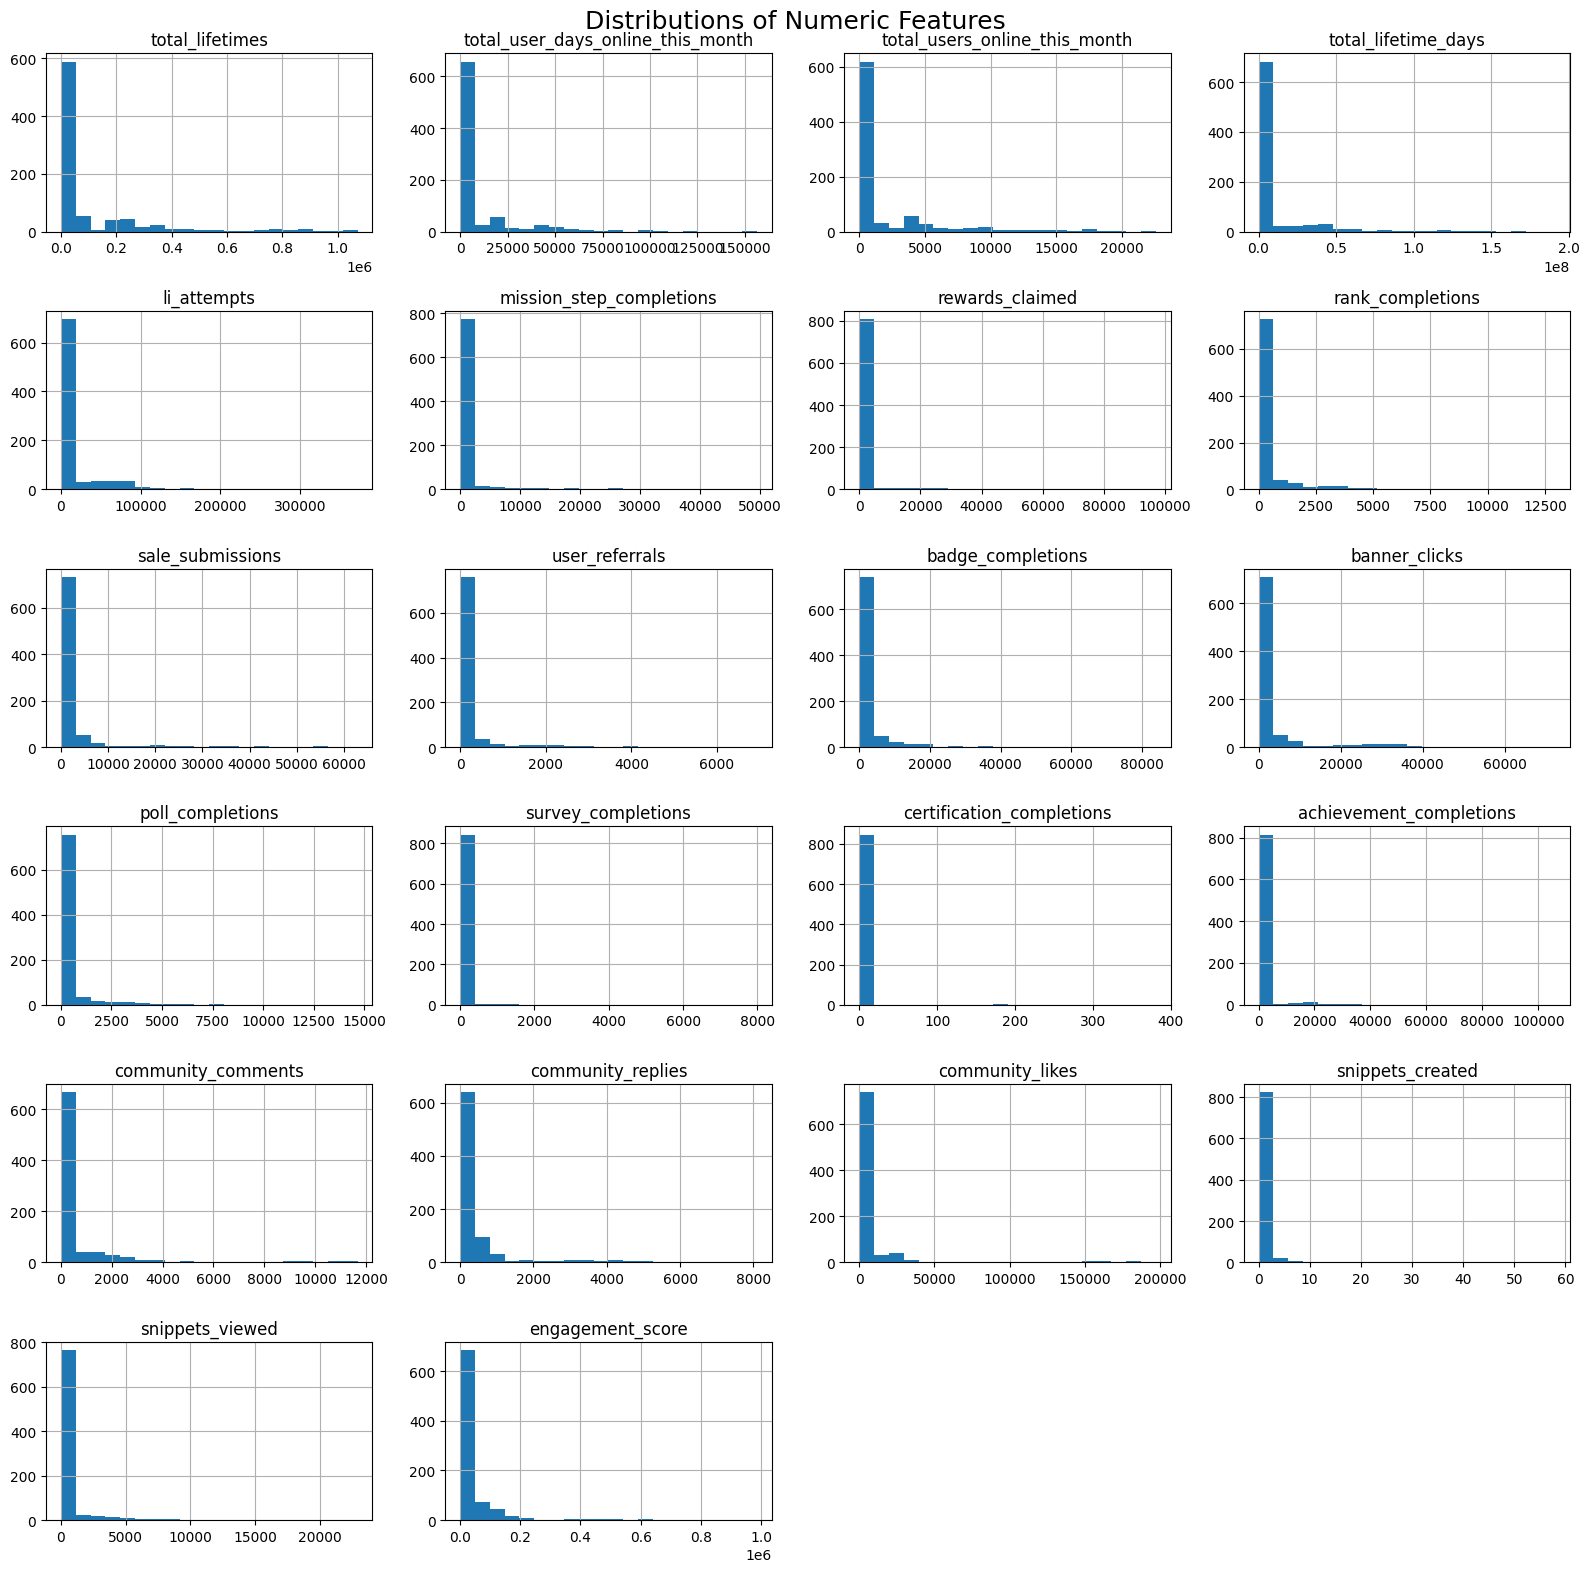

In [14]:
# Visualize the distribution of numeric features
numeric_cols = rcs.select_dtypes(include=['float64', 'int64']).columns

rcs[numeric_cols].hist(figsize=(16, 16), bins=20, layout=(6, 4))
plt.suptitle('Distributions of Numeric Features', fontsize=18)
plt.tight_layout()
plt.show()

Originally, the numeric variables were heavily right-skewed. Most rows contained very small values (close to zero), while a few had extremely large ones. 

Since this dataset represents engagement activity, this pattern suggests that a small number of users or sites are very active, whereas the majority show low or minimal engagement.

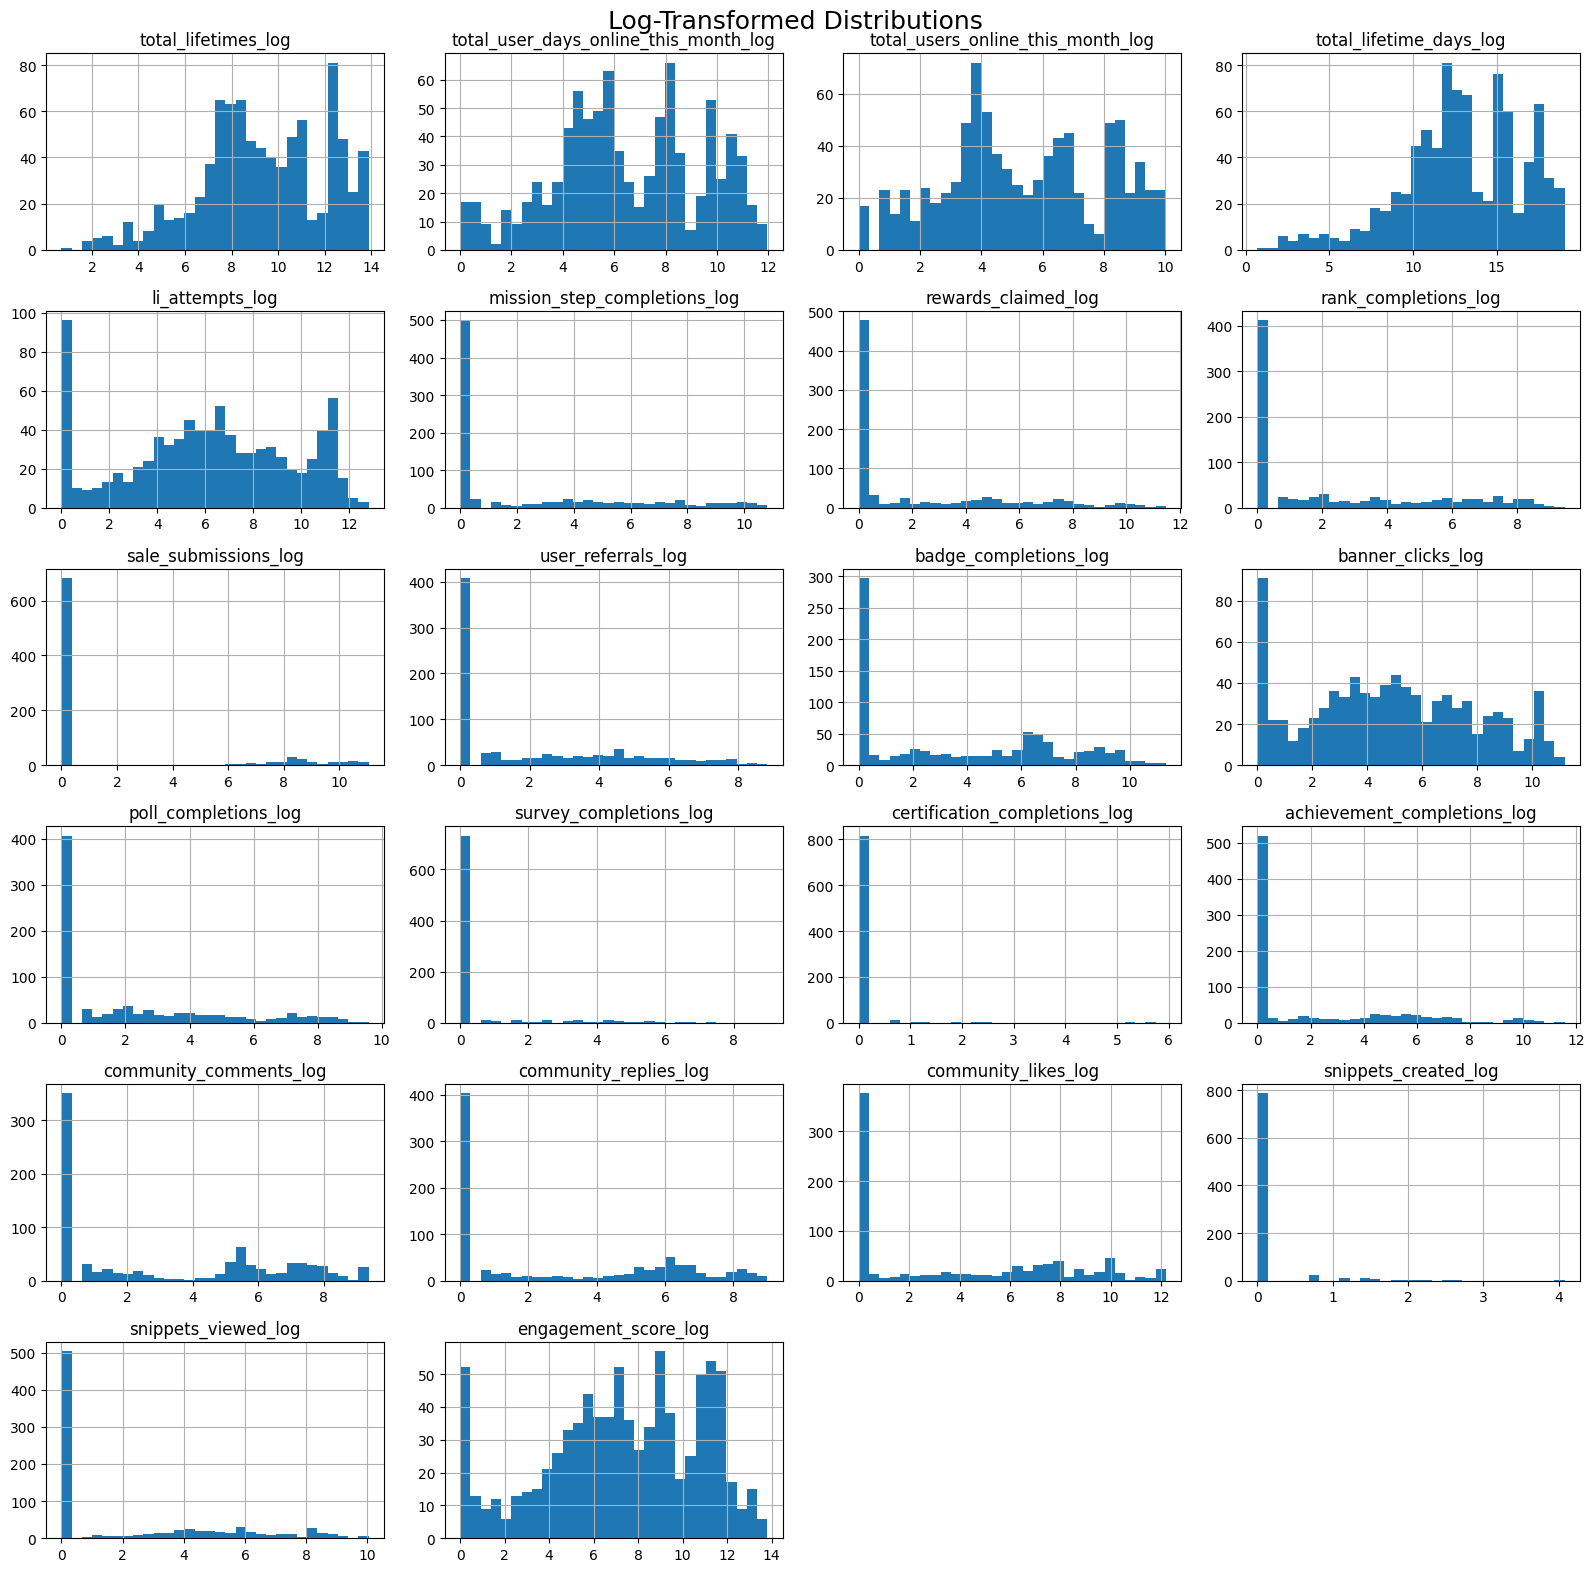

In [15]:
# Log transformation (for skewed data)
for col in numeric_cols:
    rcs[f'{col}_log'] = np.log1p(rcs[col])  # log1p handles zeros safely

rcs[[f'{col}_log' for col in numeric_cols]].hist(figsize=(16, 16), bins=30, layout=(6, 4))   # 6 rows, 4 columns

plt.suptitle('Log-Transformed Distributions', fontsize=18)
plt.tight_layout()  # adjust spacing
plt.show()

After applying the log transformation, most numeric variables show a clearer and more balanced distribution. This confirms that the original data was highly right-skewed, dominated by a few very active users or sites.

Variables such as **total_user_days_online_this_month, total_users_online_this_month, and engagement_score** display more symmetric shapes, indicating a consistent pattern of user activity.

In contrast, completion-type metrics (e.g., poll_completions, survey_completions, certification_completions) remain concentrated near zero, suggesting that only a small portion of users engage in these actions.

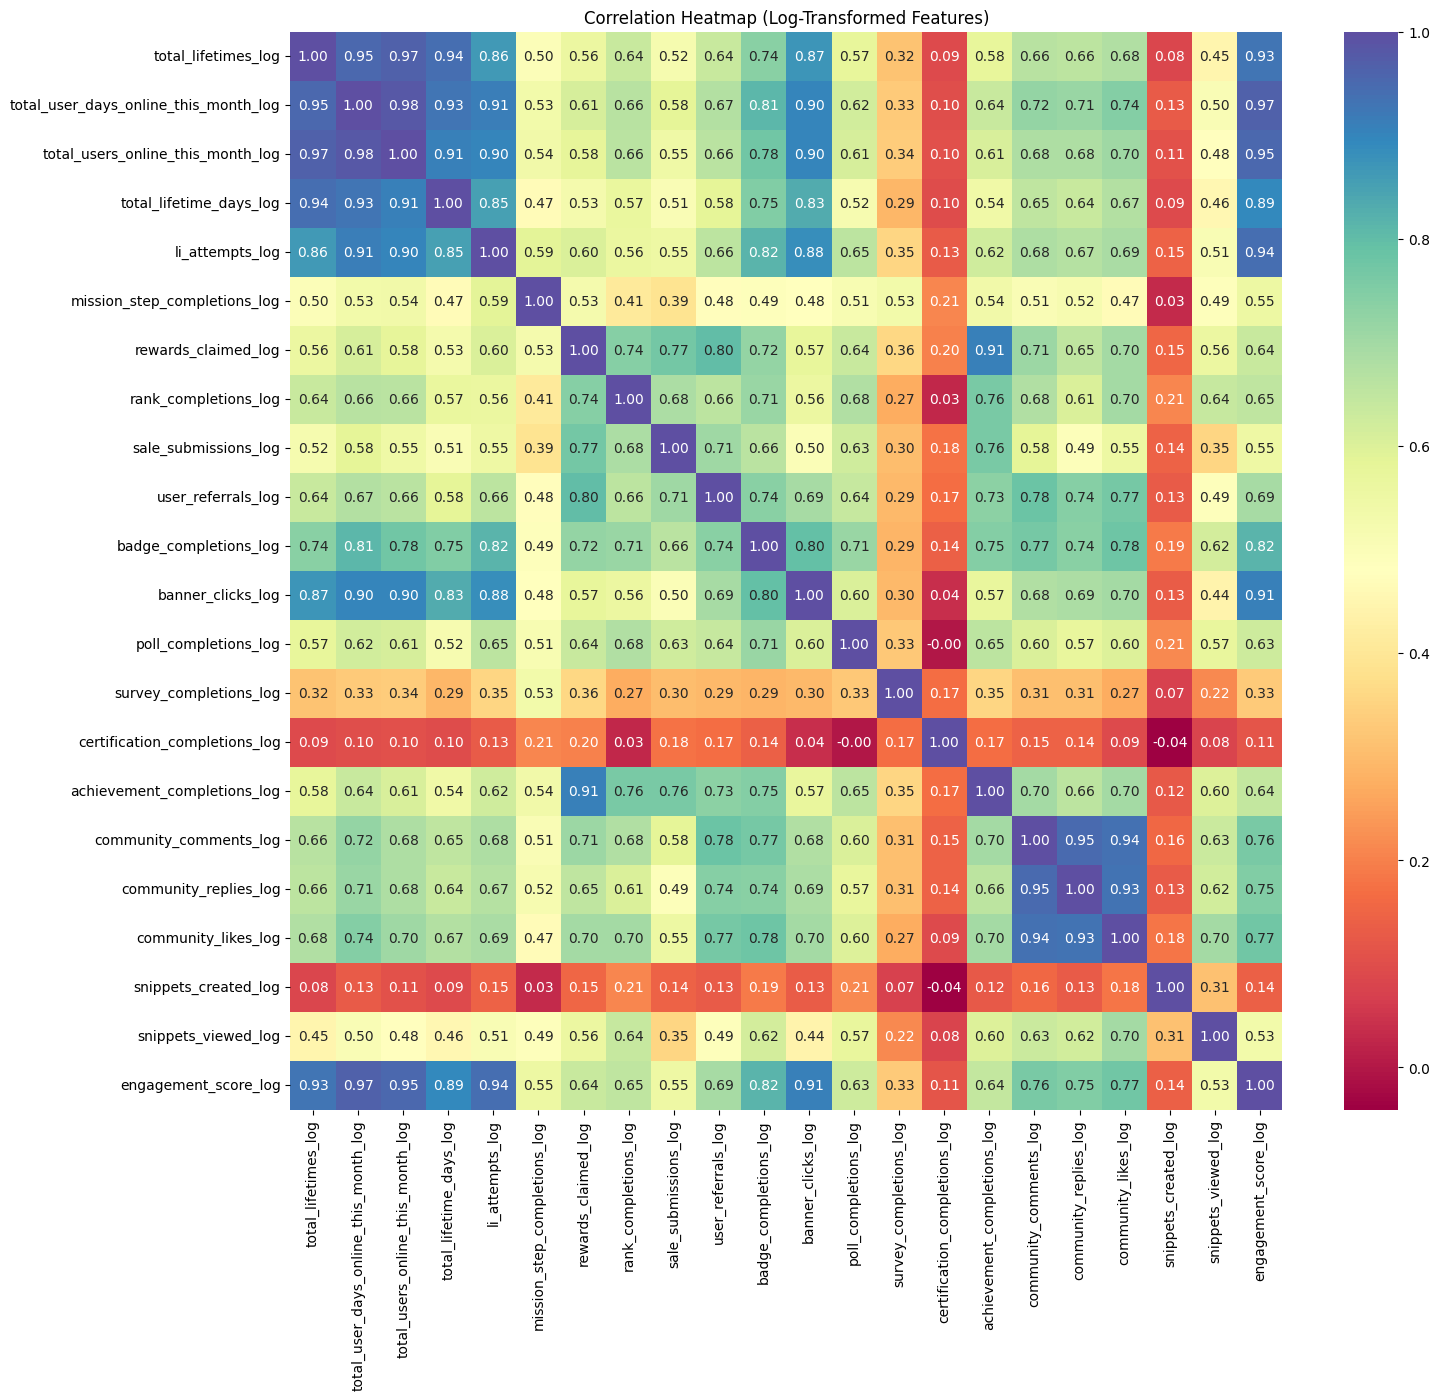

In [16]:
# Compute and visualize the correlation matrix of log-transformed variables
log_cols = [col for col in rcs.columns if col.endswith('_log')]

plt.figure(figsize=(16, 14))
sns.heatmap(rcs[log_cols].corr(), annot=True, fmt=".2f", cmap='Spectral')
plt.title('Correlation Heatmap (Log-Transformed Features)')
plt.show()

The correlation heatmap of log-transformed features shows **strong positive relationships** among most engagement-related variables, especially those **measuring user activity** (e.g., total user days, total users, and engagement scores).

**Social interaction variables (comments, likes, replies)** exhibit moderate correlations, suggesting that these behaviors are somewhat independent but still follow general engagement patterns. 

In contrast, metrics related to surveys, certifications, and snippets show low correlations, indicating they represent more specific or occasional user actions.

In [17]:
# Correlation of all log-transformed features with engagement score
corr_with_eng = rcs[[c for c in rcs.columns if c.endswith('_log')]].corr()['engagement_score_log'].sort_values(ascending=False)
corr_with_eng

engagement_score_log                     1.000000
total_user_days_online_this_month_log    0.965728
total_users_online_this_month_log        0.954274
li_attempts_log                          0.940644
total_lifetimes_log                      0.929484
banner_clicks_log                        0.907603
total_lifetime_days_log                  0.894240
badge_completions_log                    0.815647
community_likes_log                      0.773380
community_comments_log                   0.761182
community_replies_log                    0.749936
user_referrals_log                       0.691257
rank_completions_log                     0.652160
achievement_completions_log              0.644410
rewards_claimed_log                      0.635833
poll_completions_log                     0.626671
mission_step_completions_log             0.554214
sale_submissions_log                     0.552225
snippets_viewed_log                      0.532670
survey_completions_log                   0.332707


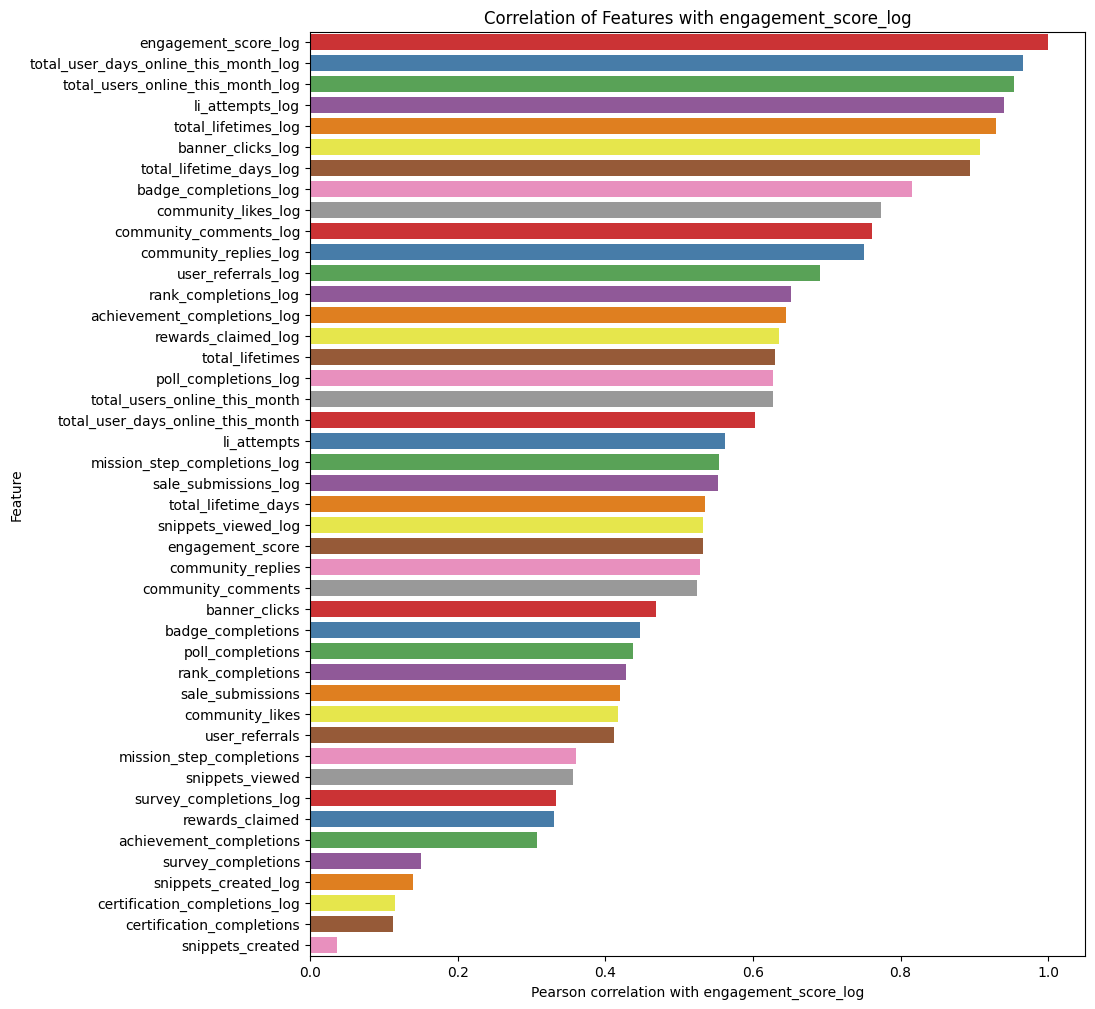

In [18]:
# Visualize correlation of all numeric features with 'engagement_score_log'
corr = rcs.corr(numeric_only=True)['engagement_score_log'].sort_values(ascending=False)

plt.figure(figsize=(10,12))
sns.barplot(x=corr.values, y=corr.index, palette="Set1")
plt.title("Correlation of Features with engagement_score_log")
plt.xlabel("Pearson correlation with engagement_score_log")
plt.ylabel("Feature")
plt.show()

The correlation analysis shows that engagement is strongly influenced by general activity metrics, such as total_user_days_online_this_month_log, total_users_online_this_month_log, and total_lifetimes_log. These variables describe general presence and participation (e.g. how long, how often, and how many people are active, instead of what specific things they do).

Moderate correlations are observed for features like banner_clicks_log, badge_completions_log, and community_likes_log, which represent interactive behaviors that contribute to engagement but are not as dominant as overall activity.

In contrast, variables such as survey_completions_log, certification_completions_log, and snippets_created_log show weak correlations, suggesting that these actions are more specialized and less common across the dataset.

**Overall, the analysis confirms that consistent user activity is the key driver of engagement, while social and reward-based interactions provide additional but secondary contributions.**

## Next Steps

We would like to implement the `Machine Learning Techniques` below for predictive analyses:
- Prediction future engagement score (per month) for future months based on past patterns (Linear Regression) **This one**
- Predict rewards claimed (Regression)
- Predict User Lifetime - Days (Regression)
- Client Segmentation (K-Means Clustering) - **This one**
- Predict `High Engagement` vs `Low Engagement` (Binary Classification - denoted each by 1s and 0s) - **This one - narrow down to NA**
- Predict regional performance (Classification)

# Seaonal Naive Attempt #1

### The objective of this section is to forecast monthly engagement scores through the end of 2026 using a regression-based approach.

In [19]:
rcs

,instance_id,client_name,site_name,region_name,client_region_name,site_region_name,month_date,total_lifetimes,total_user_days_online_this_month,total_users_online_this_month,...,poll_completions_log,survey_completions_log,certification_completions_log,achievement_completions_log,community_comments_log,community_replies_log,community_likes_log,snippets_created_log,snippets_viewed_log,engagement_score_log
0,B9A1AF2B98B61FC3D5D15CD97F4FFF7C,Google TV,Google TV,NA,Google TV,Google TV,2025-01-07,3167,68,28,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.401197,4.317488
1,B9A1AF2B98B61FC3D5D15CD97F4FFF7C,Google TV,Google TV,NA,Google TV,Google TV,2025-01-01,1856,14,5,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.079442,2.944439
2,8E5E684A2BEAEFA7FECF7F0DA8B601E8,HALIGHT,The Quarry,NA,HALIGHT,The Quarry,2025-01-04,1034,80,18,...,2.197225,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.945910,4.158883
3,8E5E684A2BEAEFA7FECF7F0DA8B601E8,HALIGHT,The Quarry,NA,HALIGHT,The Quarry,2023-01-09,2023,309,49,...,0.000000,0.000000,0.0,0.000000,2.079442,0.000000,3.784190,0.000000,4.276666,6.489205
4,8E5E684A2BEAEFA7FECF7F0DA8B601E8,HALIGHT,The Quarry,NA,HALIGHT,The Quarry,2023-01-11,2002,367,55,...,3.555348,1.609438,0.0,0.000000,1.386294,1.098612,3.465736,0.693147,4.369448,6.983790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,DE6B0516B9970243DA32DAC4AD8285D8,Motorola,motorola insiders,EMEA,Motorola EMEA,motorola insiders EMEA,2024-01-10,31035,5249,743,...,1.609438,0.000000,0.0,5.739793,5.707110,2.197225,5.805135,0.000000,0.000000,8.946245
852,9F5BAB40874B176781DBEEECF8E6833D,"Holcim Solutions and Products US, LLC",BPU,NA,"Holcim Solutions and Products US, LLC",BPU,2022-01-10,2265,59,30,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.955837
853,DE6B0516B9970243DA32DAC4AD8285D8,Motorola,motorola insiders,EMEA,Motorola EMEA,motorola insiders EMEA,2025-01-01,42810,5508,804,...,2.397895,0.000000,0.0,5.913503,5.267858,0.000000,5.252273,0.000000,0.000000,8.998260
854,F64BB50632BD035D9ACDCF5A45F76B7C,Allina Health,Learning Hub,NA,Allina Health,Learning Hub,2024-01-05,221857,34907,13550,...,7.882315,0.693147,0.0,0.693147,2.708050,2.890372,3.496508,0.000000,0.000000,11.050700


In [20]:
rcs["month_date"]

0     2025-01-07
1     2025-01-01
2     2025-01-04
3     2023-01-09
4     2023-01-11
         ...    
851   2024-01-10
852   2022-01-10
853   2025-01-01
854   2024-01-05
855   2025-01-05
Name: month_date, Length: 856, dtype: datetime64[ns]

In [21]:
# Reconstruct true monthly date based on yyyy-dd-mm schema guarantee
rcs["month_date_corrected"] = pd.to_datetime(
    {
        "year": rcs["month_date"].dt.year,
        "month": rcs["month_date"].dt.day,  # engineer says this is the TRUE month
        "day": 1
    },
    errors="coerce"
)

# Sanity checks
print(sorted(rcs["month_date_corrected"].dt.month.unique()))
print(rcs[["month_date", "month_date_corrected"]].head(10))


[np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12)]
  month_date month_date_corrected
0 2025-01-07           2025-07-01
1 2025-01-01           2025-01-01
2 2025-01-04           2025-04-01
3 2023-01-09           2023-09-01
4 2023-01-11           2023-11-01
5 2025-01-06           2025-06-01
6 2025-01-08           2025-08-01
7 2025-01-03           2025-03-01
8 2024-01-12           2024-12-01
9 2025-01-06           2025-06-01


In [22]:
rcs["month_date_corrected"]

0     2025-07-01
1     2025-01-01
2     2025-04-01
3     2023-09-01
4     2023-11-01
         ...    
851   2024-10-01
852   2022-10-01
853   2025-01-01
854   2024-05-01
855   2025-05-01
Name: month_date_corrected, Length: 856, dtype: datetime64[ns]

## Making sure the months work properly w/ engagment score (log)

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use the corrected monthly date ONLY
rcs["month_date"] = rcs["month_date_corrected"]

# Force month start (YYYY-MM-01)
rcs["month_date"] = rcs["month_date"].dt.to_period("M").dt.to_timestamp()

# Aggregate across clients → one value per month
monthly = (
    rcs.groupby("month_date")
       .agg(engagement=("engagement_score_log", "median"))
       .sort_index()
)

# Enforce regular monthly frequency
monthly = monthly.asfreq("MS")

# Sanity check
print(monthly.head())
print(monthly.tail())
print("Number of months:", len(monthly))
print(monthly.index.min(), "→", monthly.index.max())


            engagement
month_date            
2022-10-01    7.847396
2022-11-01    8.210710
2022-12-01    8.297233
2023-01-01    8.298252
2023-02-01    8.152458
            engagement
month_date            
2025-06-01    6.964136
2025-07-01    7.721986
2025-08-01    7.548556
2025-09-01    7.893945
2025-10-01    7.531552
Number of months: 37
2022-10-01 00:00:00 → 2025-10-01 00:00:00


## Train / test split 

In [24]:
seasonal_period = 12  # monthly seasonality

train = monthly.iloc[:-seasonal_period]
test  = monthly.iloc[-seasonal_period:]

## Run Seasonal Naive

In [25]:
seasonal_naive_pred = train["engagement"].iloc[-seasonal_period:].values

seasonal_naive_pred = pd.Series(
    seasonal_naive_pred,
    index=test.index
)

## Metrics

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(test["engagement"], seasonal_naive_pred)
rmse = np.sqrt(mean_squared_error(test["engagement"], seasonal_naive_pred))
r2 = r2_score(test["engagement"], seasonal_naive_pred)

mape = np.mean(
    np.abs((test["engagement"] - seasonal_naive_pred) / test["engagement"])
) * 100

print("Seasonal Naive (Log Engagement)")
print("MAE:", round(mae, 4))
print("RMSE:", round(rmse, 4))
print("MAPE (%):", round(mape, 2))
print("R²:", round(r2, 3))

Seasonal Naive (Log Engagement)
MAE: 0.4318
RMSE: 0.5213
MAPE (%): 5.84
R²: -0.659


## Plot

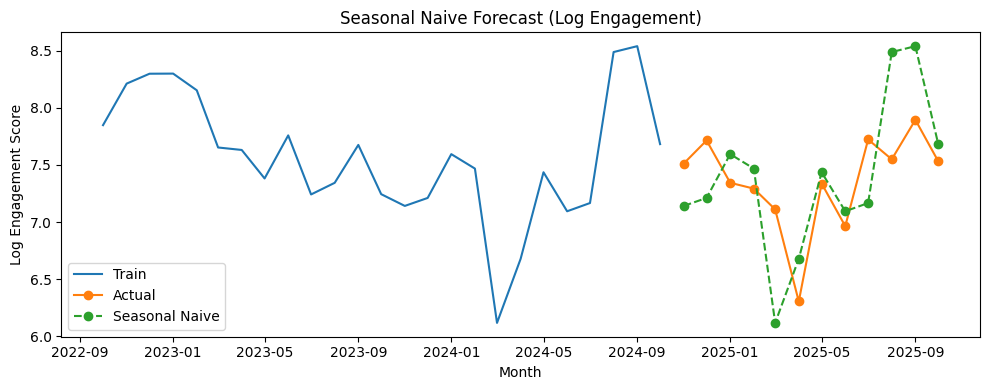

In [27]:
plt.figure(figsize=(10,4))

plt.plot(train.index, train["engagement"], label="Train")
plt.plot(test.index, test["engagement"], marker="o", label="Actual")
plt.plot(test.index, seasonal_naive_pred, marker="o", linestyle="--", label="Seasonal Naive")

plt.title("Seasonal Naive Forecast (Log Engagement)")
plt.xlabel("Month")
plt.ylabel("Log Engagement Score")
plt.legend()
plt.tight_layout()
plt.show()


We first established a Seasonal Naive baseline to quantify pure year-over-year seasonality. This baseline achieved ~6% relative error, indicating moderate seasonal consistency but also highlighting the need for a model that can adapt to changing trends.

We also realized that a negative R^2 is to be expected given how volitile the engagement is on a monthly basis.

In reality, this model is too simplistic to truly capture seasonal trends.

Our goal is to find another model that can do better than MAPE = 5.84%

# Holt-Winters (statsmodels) Attempt #1

### Holt–Winters extends the Seasonal Naive baseline by allowing the seasonal pattern to be smoothed over time and by incorporating an underlying trend component, making it more adaptive to gradual structural changes.

In [28]:
monthly.head()

,engagement
month_date,
2022-10-01,7.847396
2022-11-01,8.210710
2022-12-01,8.297233
2023-01-01,8.298252
2023-02-01,8.152458


## Train / test split

In [29]:
seasonal_period = 12

train = monthly.iloc[:-seasonal_period]
test  = monthly.iloc[-seasonal_period:]

## Fit Holt-Winters

In [30]:
#%pip install statsmodels

In [31]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw_model = ExponentialSmoothing(
    train["engagement"],
    trend="add",
    seasonal="add",
    seasonal_periods=seasonal_period
)

hw_fit = hw_model.fit(optimized=True)

## Forecast test period

In [32]:
hw_pred = hw_fit.forecast(seasonal_period)

hw_pred = pd.Series(hw_pred, index=test.index)

## Metrics

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(test["engagement"], hw_pred)
rmse = np.sqrt(mean_squared_error(test["engagement"], hw_pred))
r2 = r2_score(test["engagement"], hw_pred)

mape = np.mean(
    np.abs((test["engagement"] - hw_pred) / test["engagement"])
) * 100

print("Holt–Winters (Log Engagement)")
print("MAE:", round(mae, 4))
print("RMSE:", round(rmse, 4))
print("MAPE (%):", round(mape, 2))
print("R²:", round(r2, 3))


Holt–Winters (Log Engagement)
MAE: 0.4681
RMSE: 0.5533
MAPE (%): 6.53
R²: -0.869


## Plot

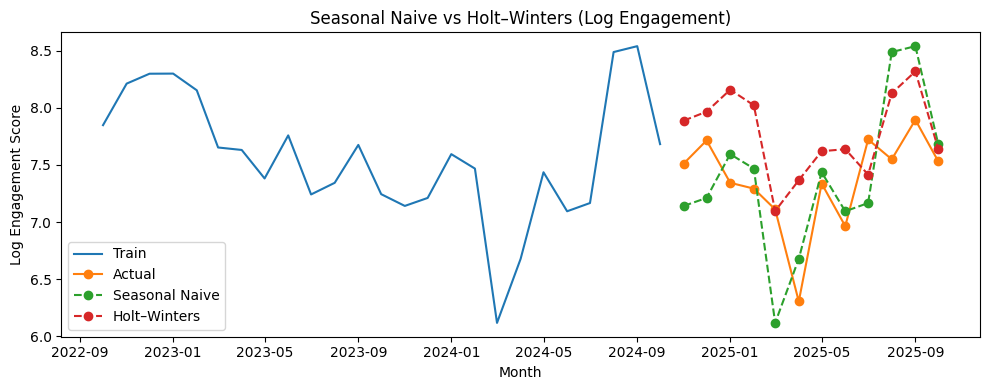

In [34]:
plt.figure(figsize=(10,4))

plt.plot(train.index, train["engagement"], label="Train")
plt.plot(test.index, test["engagement"], marker="o", label="Actual")

plt.plot(test.index, seasonal_naive_pred, 
         marker="o", linestyle="--", label="Seasonal Naive")

plt.plot(test.index, hw_pred, 
         marker="o", linestyle="--", label="Holt–Winters")

plt.title("Seasonal Naive vs Holt–Winters (Log Engagement)")
plt.xlabel("Month")
plt.ylabel("Log Engagement Score")
plt.legend()
plt.tight_layout()
plt.show()

We evaluated two time-series approaches for forecasting engagement: a Seasonal Naive baseline and a Holt–Winters exponential smoothing model. 

While Holt–Winters allows for both trend and seasonality, it did not improve predictive accuracy relative to the Seasonal Naive model. 

This indicates that engagement patterns are primarily driven by recurring monthly seasonality rather than a smooth underlying trend. 

As a result, we selected the Seasonal Naive model as the final forecasting approach due to its lower error and greater robustness.

# Seasonal Naive Forecast

## Using all Data

In [35]:
full_series = monthly["engagement"]

## Forecast

### 2026

In [36]:
seasonal_period = 12
horizon_2026 = 12

last_year_values = full_series.iloc[-seasonal_period:].values

forecast_2026 = pd.Series(
    last_year_values,
    index=pd.date_range(
        start=full_series.index[-1] + pd.offsets.MonthBegin(1),
        periods=horizon_2026,
        freq="MS"
    )
)

### 2027

In [37]:
forecast_2027 = pd.Series(
    last_year_values,
    index=pd.date_range(
        start=forecast_2026.index[-1] + pd.offsets.MonthBegin(1),
        periods=12,
        freq="MS"
    )
)


## Plot

### 2026

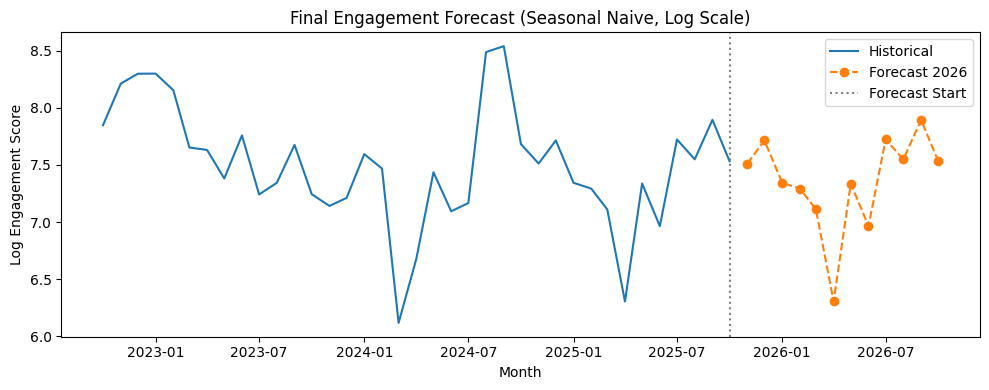

In [38]:
plt.figure(figsize=(10,4))

plt.plot(full_series.index, full_series, label="Historical")
plt.plot(forecast_2026.index, forecast_2026, marker="o", linestyle="--", label="Forecast 2026")

# Optional
# plt.plot(forecast_2027.index, forecast_2027, marker="o", linestyle="--", label="Forecast 2027")

plt.axvline(full_series.index[-1], linestyle=":", color="gray", label="Forecast Start")

plt.title("Final Engagement Forecast (Seasonal Naive, Log Scale)")
plt.xlabel("Month")
plt.ylabel("Log Engagement Score")
plt.legend()
plt.tight_layout()
plt.show()


We refit the Seasonal Naive model using all available historical data and used it to forecast engagement through 2026. 

These forecasts should be interpreted as expected seasonal behavior under stable conditions, rather than precise predictions of future business-driven changes.

### 2027

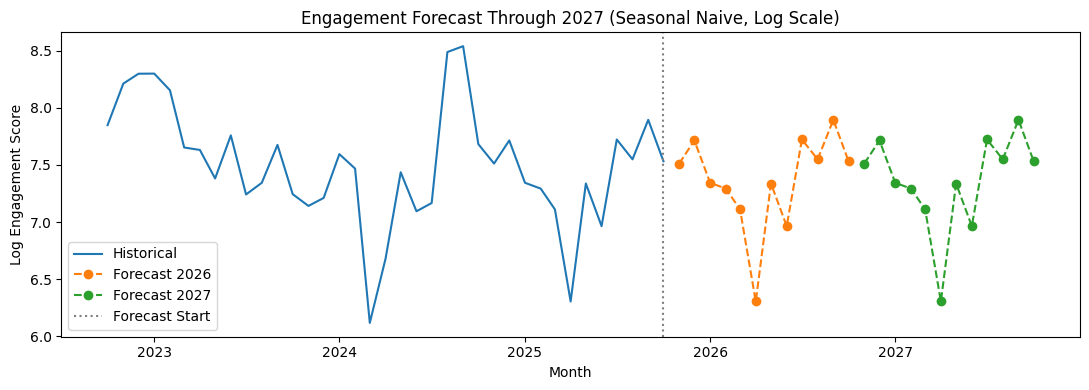

In [39]:
plt.figure(figsize=(11,4))

plt.plot(full_series.index, full_series, label="Historical")
plt.plot(forecast_2026.index, forecast_2026, 
         marker="o", linestyle="--", label="Forecast 2026")
plt.plot(forecast_2027.index, forecast_2027, 
         marker="o", linestyle="--", label="Forecast 2027")

plt.axvline(full_series.index[-1], linestyle=":", color="gray", label="Forecast Start")

plt.title("Engagement Forecast Through 2027 (Seasonal Naive, Log Scale)")
plt.xlabel("Month")
plt.ylabel("Log Engagement Score")
plt.legend()
plt.tight_layout()
plt.show()


Using the selected Seasonal Naive model, we generated forecasts for both 2026 and 2027. The 2026 forecast is based on observed engagement from the corresponding months in 2025, while the 2027 forecast extends this pattern using the 2026 projections. 

As expected, uncertainty increases in the second forecast year because predictions are based on prior forecasts rather than observed data. These results therefore represent expected seasonal behavior under stable conditions rather than precise future outcomes.

# Client Segmentation (K-Means Clustering)
### Step 1: Select features for clustering

In [40]:
# Features that describe client engagement behavior
cluster_features = [
    'total_user_days_online_this_month_log',
    'total_users_online_this_month_log',
    'li_attempts_log',
    'banner_clicks_log',
    'badge_completions_log',
    'community_likes_log',
    'community_comments_log',
    'community_replies_log',
    'engagement_score_log'
]

### Step 2: Aggregate data to client level

In [41]:
# Aggregate monthly data to create one profile per client
# Using mean values to represent typical client behavior
client_df = (
    rcs
    .groupby('client_name')[cluster_features]
    .mean()
    .reset_index()
)

# Preview the aggregated client-level dataset
client_df.head()

,client_name,total_user_days_online_this_month_log,total_users_online_this_month_log,li_attempts_log,banner_clicks_log,badge_completions_log,community_likes_log,community_comments_log,community_replies_log,engagement_score_log
0,Allina Health,9.631617,8.710812,9.776877,6.618707,0.236658,1.398543,0.960183,0.769911,10.009871
1,Bridgestone,9.879809,8.393794,9.478812,10.352381,6.442744,7.437736,5.358076,6.461973,10.783696
2,College Athlete Payment System,5.631720,4.788813,4.072600,1.537035,0.000000,0.000000,0.000000,0.000000,4.340984
3,Electrolux,4.019114,3.079828,4.379705,3.845596,1.082329,0.415888,0.277259,0.138629,5.355146
4,Epson,8.244220,6.702445,7.524138,6.745946,6.122731,9.958919,7.244791,6.682315,10.306286


### Step 3: Scale the features

In [42]:
from sklearn.preprocessing import StandardScaler

# Select only numeric features (exclude client_name)
X = client_df[cluster_features]

# Standardize features so they have mean = 0 and std = 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Step 4: Determine the optimal number of clusters (Elbow Method)

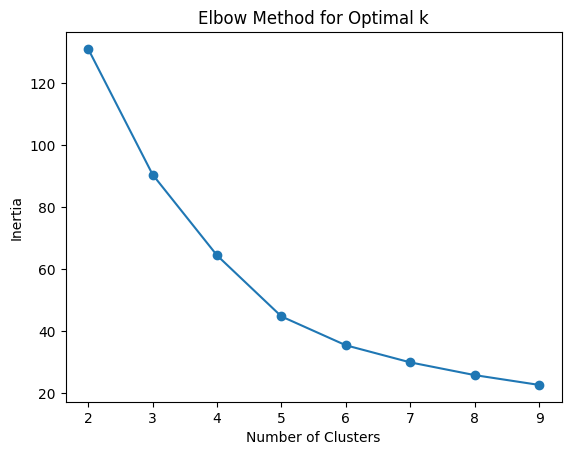

In [43]:
from sklearn.cluster import KMeans

inertia = []
K = range(2, 10)

# Fit K-Means with different values of k
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

### Step 5: Fit the final K-Means model

In [44]:
# Choose the number of clusters (k = 4)
kmeans = KMeans(n_clusters=4, random_state=42)

# Assign cluster labels to each client
client_df['cluster'] = kmeans.fit_predict(X_scaled)

# Preview clustered clients
client_df.head()

,client_name,total_user_days_online_this_month_log,total_users_online_this_month_log,li_attempts_log,banner_clicks_log,badge_completions_log,community_likes_log,community_comments_log,community_replies_log,engagement_score_log,cluster
0,Allina Health,9.631617,8.710812,9.776877,6.618707,0.236658,1.398543,0.960183,0.769911,10.009871,3
1,Bridgestone,9.879809,8.393794,9.478812,10.352381,6.442744,7.437736,5.358076,6.461973,10.783696,2
2,College Athlete Payment System,5.631720,4.788813,4.072600,1.537035,0.000000,0.000000,0.000000,0.000000,4.340984,1
3,Electrolux,4.019114,3.079828,4.379705,3.845596,1.082329,0.415888,0.277259,0.138629,5.355146,1
4,Epson,8.244220,6.702445,7.524138,6.745946,6.122731,9.958919,7.244791,6.682315,10.306286,2


### Step 6: Analyze and interpret clusters

In [45]:
# Calculate average feature values per cluster
cluster_profile = (
    client_df
    .groupby('cluster')[cluster_features]
    .mean()
    .round(2)
)

cluster_profile

,total_user_days_online_this_month_log,total_users_online_this_month_log,li_attempts_log,banner_clicks_log,badge_completions_log,community_likes_log,community_comments_log,community_replies_log,engagement_score_log
cluster,,,,,,,,,
0,5.99,4.60,5.55,4.07,3.10,4.23,3.99,3.63,7.02
1,3.29,2.61,2.82,1.90,0.28,0.04,0.35,0.04,3.38
2,9.38,7.92,9.23,7.63,7.36,8.30,6.60,6.44,10.67
3,8.74,7.78,9.21,6.90,3.48,0.70,0.49,0.38,9.50


Client segmentation was performed using K-Means clustering on log-transformed engagement metrics aggregated at the client level. The Elbow Method suggested that four clusters were appropriate for the analysis.

- Cluster 1 includes clients with low engagement, showing limited platform usage and little interaction.

- Cluster 0 represents clients with moderate and consistent engagement.

- Cluster 3 contains highly active clients who mainly use the platform’s core features but interact less with the community.

- Cluster 2 represents the most engaged clients, combining high activity with strong social and reward-based interactions.

Overall, these segments help identify different engagement patterns and support targeted strategies for improving retention and client growth.

## Check cluster sizes

In [46]:
# Number of clients in each cluster
client_df['cluster'].value_counts().sort_index()

cluster
0    10
1    18
2     6
3     2
Name: count, dtype: int64

## Clients per cluster

In [47]:
# Filter clients in Cluster 1: Low Engagment
client_df[client_df['cluster'] == 1][
    ['client_name', 'engagement_score_log']
].sort_values('engagement_score_log')

,client_name,engagement_score_log
28,Schneider Electric,0.053319
7,GoPro,0.427492
25,Portage,1.268598
11,Halight Conduit,1.290400
29,SimpliSafe,1.767450
5,Euronics,1.772600
32,The Re-Wired Group,2.327334
22,Nacon,3.035590
24,PopSockets,3.292830
9,Google TV,4.003885


In [48]:
# Filter clients in Cluster 0: Moderate and consistent engagement
client_df[client_df['cluster'] == 0][
    ['client_name', 'engagement_score_log']
].sort_values('engagement_score_log')

,client_name,engagement_score_log
10,HALIGHT,6.049187
27,Roku,6.445355
6,Fitbit,6.557756
19,MRT,6.576841
26,Ring,6.658738
8,Google Pepe - Android,6.891831
13,Harmon International.,7.009744
30,TCL,7.612685
17,Learn Chromebook,7.960386
12,Halight Energize Retail,8.440104


In [49]:
# Filter clients in Cluster 2: Most engaged clients
client_df[client_df['cluster'] == 2][
    ['client_name', 'engagement_score_log']
].sort_values('engagement_score_log')

,client_name,engagement_score_log
21,Motorola,9.474133
4,Epson,10.306286
1,Bridgestone,10.783696
34,ZAGG,10.880906
16,JB Hi-Fi - Studio,11.227158
23,Otter,11.358734


In [50]:
# Filter clients in Cluster 3: High activity - low social
client_df[client_df['cluster'] == 3][
    ['client_name', 'engagement_score_log']
].sort_values('engagement_score_log')

,client_name,engagement_score_log
20,Marvin,8.996308
0,Allina Health,10.009871


## Summary Table

In [51]:
summary_table = (
    client_df
    .groupby('cluster')
    .agg(
        clients=('client_name', 'count'),
        avg_engagement=('engagement_score_log', 'mean'),
        avg_activity=('total_user_days_online_this_month_log', 'mean'),
        avg_social=('community_likes_log', 'mean')
    )
    .round(2)
)

summary_table

,clients,avg_engagement,avg_activity,avg_social
cluster,,,,
0,10,7.02,5.99,4.23
1,18,3.38,3.29,0.04
2,6,10.67,9.38,8.30
3,2,9.50,8.74,0.70


## Engagement Score Distribution by Client Segment (Boxplot)

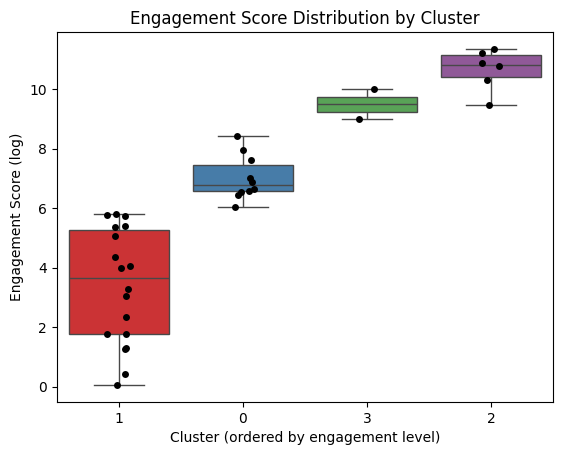

In [52]:
# Display clusters from lowest to highest engagement
cluster_order = (
    client_df
    .groupby('cluster')['engagement_score_log']
    .median()
    .sort_values()
    .index
)

# Create a boxplot to visualize the distribution of engagement scores by cluster
sns.boxplot(
    data=client_df,
    x='cluster',
    y='engagement_score_log',
    order=cluster_order,
    palette='Set1'
)

# Add individual data points to show client-level dispersion
sns.stripplot(
    data=client_df,
    x='cluster',
    y='engagement_score_log',
    order=cluster_order,
    color='black'
)

plt.title('Engagement Score Distribution by Cluster')
plt.xlabel('Cluster (ordered by engagement level)')
plt.ylabel('Engagement Score (log)')
plt.show()

The boxplot shows clear differences in engagement levels across clusters.

- Cluster 1 displays the lowest median engagement and the widest variability, indicating a group of low and inconsistent users.

- Cluster 0 represents moderate engagement with relatively stable behavior.

- Clusters 3 and 2 show higher engagement levels.

- Cluster 2 has the highest median engagement score.

The limited spread observed in Cluster 3 reflects its small size and highly active client profile.

## Client Segmentation: Activity vs Engagement (Scatter Plot)

In [53]:
# Define labels for each cluster for better interpretation
cluster_labels = {
    0: 'C0: Moderate Engagement',
    1: 'C1: Low Engagement',
    2: 'C2: High Engagement (Power Users)',
    3: 'C3: High Activity – Low Social'
}

client_df['cluster_label'] = client_df['cluster'].map(cluster_labels)

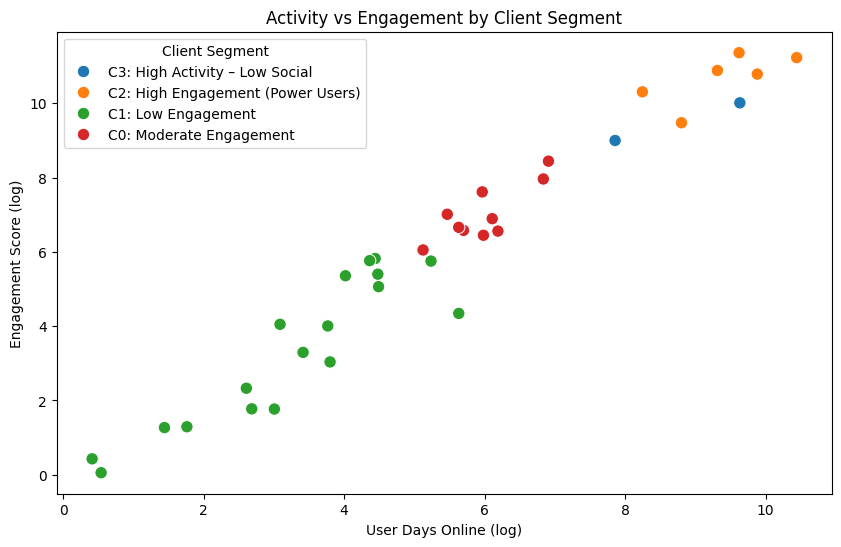

In [54]:
# Create a scatter plot to visualize the relationship between activity and engagement
plt.figure(figsize=(10, 6)) 
sns.scatterplot(
    data=client_df,
    x='total_user_days_online_this_month_log',
    y='engagement_score_log',
    hue='cluster_label',
    palette='tab10',
    s=80
)

plt.title('Activity vs Engagement by Client Segment')
plt.xlabel('User Days Online (log)')
plt.ylabel('Engagement Score (log)')
plt.legend(title='Client Segment')
plt.show()

The scatter plot shows a strong positive relationship between platform activity (user days online) and overall engagement score.

Clusters are clearly separated along this relationship.
- Cluster 1 is concentrated in the lower-left region of the plot, representing clients with low activity and low engagement.
- Cluster 0 shows moderate activity and engagement levels.
- Cluster 3 includes highly active clients with strong engagement.
- Cluster 2 represents the most active and engaged clients, positioned in the upper-right area of the plot.

# Predicting `High` vs. `Low` Engagement using `Logistic Regression`

#### A. Define Target Variable

Create a new binary column 'high_engagement' based on whether the 'engagement_score_log' is above or below the median.

In [75]:
median_engagement_score_log = rcs['engagement_score_log'].median()
rcs['high_engagement'] = (
    rcs['engagement_score_log'] > median_engagement_score_log
).astype(int)

print(f"Median engagement_score_log: {median_engagement_score_log}")
print(rcs[['engagement_score_log', 'high_engagement']].head())

Median engagement_score_log: 7.457894395754314
   engagement_score_log  high_engagement
0              4.317488                0
1              2.944439                0
2              4.158883                0
3              6.489205                0
4              6.983790                0


#### B. Select Features

Choose the log-transformed features that show strong correlation with 'engagement_score_log' as our predictors (X).

In [76]:
features = corr_with_eng[corr_with_eng >= 0.7].index.tolist()
features.remove('engagement_score_log')

X = rcs[features]
y = rcs['high_engagement']

print("First 5 rows of X (Independent Variables):")
print(X.head())

print("\nFirst 5 rows of y (Dependent Variable - high_engagement):")
print(y.head())


First 5 rows of X (Independent Variables):
   total_user_days_online_this_month_log  total_users_online_this_month_log  \
0                               4.234107                           3.367296   
1                               2.708050                           1.791759   
2                               4.394449                           2.944439   
3                               5.736572                           3.912023   
4                               5.908083                           4.025352   

   li_attempts_log  total_lifetimes_log  banner_clicks_log  \
0         3.555348             8.060856           2.484907   
1         1.945910             7.526718           1.791759   
2         3.891820             6.942157           0.000000   
3         6.135565             7.612831           2.833213   
4         6.646391             7.602401           3.135494   

   total_lifetime_days_log  badge_completions_log  community_likes_log  \
0                10.636624         

#### C. Split Data

Divide the dataset into training and test sets for both features (X) and the target variable (y).
- `Training sets`: to study relationships between features (X) and target (y) - also called `fitting` the model.
- `Test sets`: evaluate model performance or see how effective the model is on unfamiliar data.

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (684, 10)
Shape of X_test: (172, 10)
Shape of y_train: (684,)
Shape of y_test: (172,)


#### D. Train Logistic Regression Model

Initialize and train a Logistic Regression model using training data.

In [78]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    random_state=42,
    solver='liblinear'
)

model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

#### E. Generate Predictions

In [79]:
y_pred = model.predict(X_test)

#### F. Evaluate Model Performance

Evaluate the performance of the trained Logistic Regression model on the test set using classification metrics such as:  
- Accuracy
- Precision
- Recall
- F1-Score.

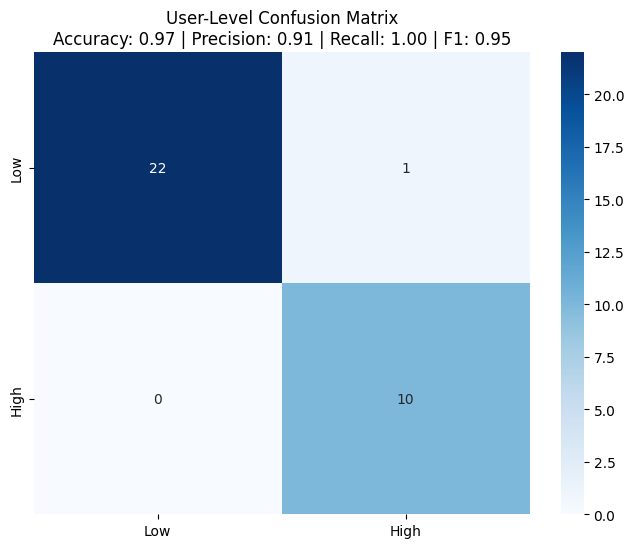

In [80]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

import matplotlib.pyplot as plt
import seaborn as sns

# Attach client names to predictions
eval_df = rcs.loc[X_test.index, ['client_name']].copy()
eval_df['y_true'] = y_test.values
eval_df['y_pred'] = y_pred

# Keep ONE record per user
eval_df_unique = eval_df.drop_duplicates(subset='client_name')

accuracy = accuracy_score(
    eval_df_unique['y_true'],
    eval_df_unique['y_pred']
)

precision = precision_score(
    eval_df_unique['y_true'],
    eval_df_unique['y_pred']
)

recall = recall_score(
    eval_df_unique['y_true'],
    eval_df_unique['y_pred']
)

f1 = f1_score(
    eval_df_unique['y_true'],
    eval_df_unique['y_pred']
)

cm = confusion_matrix(
    eval_df_unique['y_true'],
    eval_df_unique['y_pred']
)


plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Low", "High"],
    yticklabels=["Low", "High"]
)

plt.title(
    f"User-Level Confusion Matrix\n"
    f"Accuracy: {accuracy:.2f} | "
    f"Precision: {precision:.2f} | "
    f"Recall: {recall:.2f} | "
    f"F1: {f1:.2f}"
)

plt.show()

## Summary:

### Data Analysis Key Findings

*   The median `engagement_score_log` was calculated to be 7.457894395754314. A binary target variable, `high_engagement`, was created, assigning 1 if 'engagement\_score\_log' is above the median and 0 otherwise.

*   Ten log-transformed features were selected as independent variables due to their strong correlation ($\ge$ 0.7) with `engagement_score_log`. These features include:  
    - `total_user_days_online_this_month_log`
    - `total_users_online_this_month_log`
    - `li_attempts_log`
    - `total_lifetimes_log`
    - `banner_clicks_log`
    - `total_lifetime_days_log`
    - `badge_completions_log`
    - `community_likes_log`
    - `community_comments_log`
    - `community_replies_log`

*   The dataset was split into training and testing sets with a 80/20 ratio. The training set consists of 684 samples, and the testing set has 172 samples.

*   A Logistic Regression model was trained and evaluated on the test set, achieving the following performance metrics:
    *   Accuracy: 0.97
    $$ Accuracy = \frac{ TP + TN }{TP + TN + FP + FN} $$

    `Accuracy` answers the question: how often does the model correctly identify user engagement as `high` or `low`?

    With an accuracy of 97%, the model predicted 97% of users' engagement correctly


    *   Precision: 0.91 

        $$ Precision = \frac{ TP }{TP + FP} $$

    `Precision` answers the question: of all users the model predicted as `highly engaged`, how many are `actually` highly engaged?
    
    A precision of 91% means that when the model predicts high engagement, it is correct 91% of the time.


    *   Recall: 100%  

    $$ Recall = \frac{ TP }{TP FN} $$

    `Recall` answers the question: of all truly highly engaged users, how many did the model correctly identify?
    
    A recall of 100% means the model identified 94% of all highly engaged users and missed a few.

    *   F1-Score: 0.95

        $$ F1-Score = 2 * \frac{ Precision * Recall }{Precision + Recall} $$

    `F1-Score` gives a single score, reflecting both accuracy in predicting high engagement and ability to capture all active users 
    
    An F1-Score of 95% means the model is very good at predicting high engagement while minimizing both false positives and false negatives.

*   The confusion matrix shows:  
    - 22 true negatives: 
        - our classification model correctly identified 22 users who are less engaged with Halight's platform and services 
    - 10 True Positives: 
        - the classification model correctly identified 10 users as `active` and `engaged`
    - 1 false positive: 
        - our classification model incorrectly predicted 1 less-engaged user as `highly engaged`
    - 0 false negatives: 
        - our classification model incorrectly predicted no highly-engaged users as `less engaged`

### Insights or Next Steps

*   The Logistic Regression model demonstrates excellent performance in predicting high engagement, with high accuracy, precision, and recall. This suggests that the selected highly correlated features are strong indicators of engagement.

*   Further analysis could involve exploring the coefficients of the Logistic Regression model to understand the relative importance of each feature in predicting high engagement, or investigating the 8 misclassified instances (1 false positive and 0 false negatives) to identify any underlying patterns or anomalies.